###Import Library

In [ ]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

import IPython.display as ipd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mypath = "/content/drive/MyDrive/Vocal Dataset"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))] 

###Data Labelling

In [ ]:
import os

labels = []
filetitle = []
for filename in os.listdir(mypath):
    if filename.endswith('.wav'):
      label = filename.split('_')[0]
      filetitle.append(filename.split('.')[0])
      labels.append(label)

In [ ]:
filepaths = [join(mypath, f) for f in filenames] 


####One Hot Encode Labels

In [ ]:
for filename in os.listdir(mypath+'/Expansion'):
    if filename.endswith('.wav'):
      label = filename.split('_')[0]
      labels.append(label)
for filename in os.listdir(mypath+'/Augmentation'):
    if filename.endswith('.wav'):
      label = filename.split('_')[0]
      labels.append(label)
for filename in os.listdir(mypath+'/Augmentation2'):
    if filename.endswith('.wav'):
      label = filename.split('_')[0]
      labels.append(label)
for filename in os.listdir(mypath+'/Augmentation3'):
    if filename.endswith('.wav'):
      label = filename.split('_')[0]
      labels.append(label)

In [ ]:
len(labels)

2550

In [ ]:
labelencoder = LabelEncoder()
i_labels = labelencoder.fit_transform(labels)
oh_labels = to_categorical(i_labels) 

In [ ]:
oh_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

###MFCC

In [ ]:
max_pad_len = 862 # to make the length of all MFCC equal

def mfcc(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

####Feature Extraction for Each Audio Files

In [ ]:
%cd /content/drive/MyDrive/Vocal Dataset

/content/drive/MyDrive/Vocal Dataset


In [ ]:
filenames2 = [f for f in listdir(mypath+'/Augmentation') if (isfile(join(mypath+'/Augmentation', f)) and f.endswith('.wav'))] 
filepaths2 = [join(mypath+'/Augmentation', f) for f in filenames2]
filenames3 = [f for f in listdir(mypath+'/Augmentation2') if (isfile(join(mypath+'/Augmentation2', f)) and f.endswith('.wav'))] 
filepaths3 = [join(mypath+'/Augmentation2', f) for f in filenames3]
filenames4 = [f for f in listdir(mypath+'/Expansion') if (isfile(join(mypath+'/Expansion', f)) and f.endswith('.wav'))] 
filepaths4 = [join(mypath+'/Expansion', f) for f in filenames4]
filenames5 = [f for f in listdir(mypath+'/Augmentation3') if (isfile(join(mypath+'/Augmentation3', f)) and f.endswith('.wav'))] 
filepaths5 = [join(mypath+'/Augmentation3', f) for f in filenames5]

In [ ]:
len(filepaths3)

2640

In [ ]:
features = [] 

# Iterate through each sound file and extract the features
for file_name in filepaths:
    data = mfcc(file_name)
    features.append(data)    

for file_name in filepaths2:
    print(file_name)
    data = mfcc(file_name)
    features.append(data)

for file_name in filepaths3:
    data = mfcc(file_name)
    features.append(data)

for file_name in filepaths4:
    data = mfcc(file_name)
    features.append(data)
 
for file_name in filepaths5:
    data = mfcc(file_name)
    features.append(data)

print('Finished feature extraction from ', len(features), ' files')
features = np.array(features)

/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_0.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_1.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_2.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_3.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_4.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_5.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_6.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_7.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_8.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_9.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_10.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_11.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_12.wav
/content/drive/MyDrive/Vocal Dataset/Augmentation/Alto_7_augment_13.wav
/c

In [ ]:
len(features)

2550

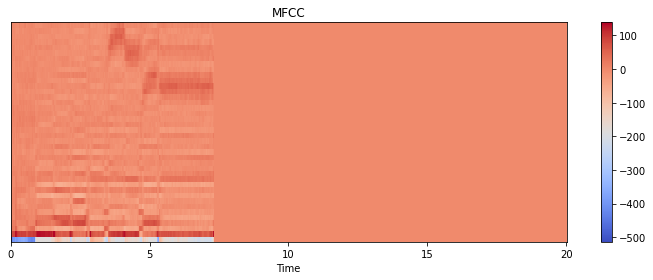

In [ ]:
# plot an MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(features[7], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
features = np.array(features) 

In [ ]:
np.save('mfcc_features.npy', features)

In [ ]:
features = np.load('/content/drive/MyDrive/Vocal Dataset/mfcc_features.npy')

In [ ]:
features.shape

(2550, 40, 862)

In [ ]:
# print class counts
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['Alto' 'Bass' 'Sopran' 'Tenor']
 ['510' '765' '510' '765']]


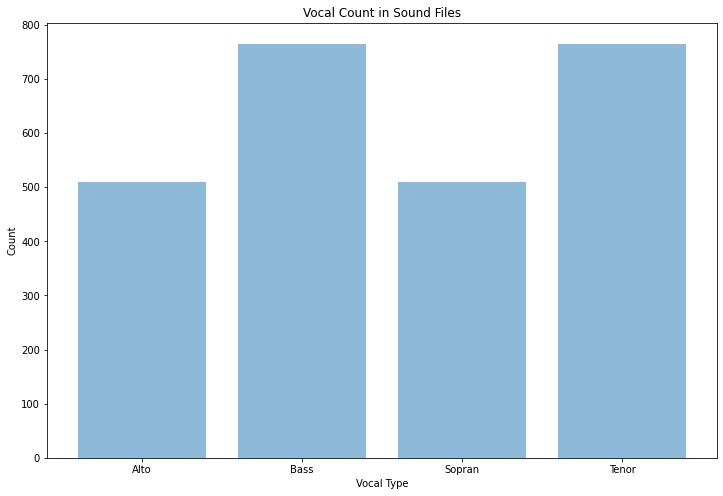

In [ ]:
# plot class counts
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12,8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Vocal Type')
plt.title('Vocal Count in Sound Files')
plt.show()

In [ ]:
# add channel dimension for CNN
features1 = np.reshape(features, (*features.shape,1)) 

In [ ]:
features1.shape

(2550, 40, 862, 1)

###Split Training and Testing Data

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(features1, oh_labels, stratify=oh_labels, 
                                                    test_size=0.2, random_state = None)

###CNN

####Create Model

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
num_rows = 40
num_columns = 862
num_channels = 1

#opt = 'adam'
opt = SGD(lr=0.009, momentum=0.9)
num_labels = oh_labels.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=filter_size,
                 input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=filter_size, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax')) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt) 

In [ ]:
# Display model architecture summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 861, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 430, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 430, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 429, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 214, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 214, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 213, 64)        8

In [ ]:
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

16/16 [==============================] - 4s 194ms/step - loss: 5.9894 - accuracy: 0.3000
Pre-training accuracy: 30.0000%


####Training Model

In [ ]:
# train model
num_epochs = 100
num_batch_size = 128

callbacks = [
    ModelCheckpoint(
        filepath='mymodel2_{epoch:02d}.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_accuracy` score has improved.
        save_best_only=True,
        monitor='val_accuracy',
        verbose=5),
    #tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
]
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(x_test, y_test), callbacks=callbacks, verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
16/16 [==============================] - 47s 3s/step - loss: 3.8324 - accuracy: 0.2569 - val_loss: 1.3749 - val_accuracy: 0.3196

Epoch 00001: val_accuracy improved from -inf to 0.31961, saving model to mymodel2_01.h5
Epoch 2/100
16/16 [==============================] - 45s 3s/step - loss: 1.2317 - accuracy: 0.4382 - val_loss: 1.0127 - val_accuracy: 0.7059

Epoch 00002: val_accuracy improved from 0.31961 to 0.70588, saving model to mymodel2_02.h5
Epoch 3/100
16/16 [==============================] - 45s 3s/step - loss: 0.7821 - accuracy: 0.7176 - val_loss: 0.3339 - val_accuracy: 0.9098

Epoch 00003: val_accuracy improved from 0.70588 to 0.90980, saving model to mymodel2_03.h5
Epoch 4/100
16/16 [==============================] - 45s 3s/step - loss: 0.1538 - accuracy: 0.9505 - val_loss: 0.0337 - val_accuracy: 0.9961

Epoch 00004: val_accuracy improved from 0.90980 to 0.99608, saving model to mymodel2_04.h5
Epoch 5/100
16/16 [==============================] - 45s 3s/step - loss

####Evaluate Model

In [ ]:
score = model.evaluate(x_train, y_train, verbose=5)
print("Training Accuracy: ", score[1] * 100,'%')

score = model.evaluate(x_test, y_test, verbose=5)
print("Testing Accuracy: ", score[1] * 100, '%')

Training Accuracy:  100.0 %
Testing Accuracy:  100.0 %


In [ ]:
preds = model.predict(x_test) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(y_test, axis=1) # true classes

n_classes=4 # number of classes

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
c_names = ['Tenor', 'Bass', 'Sopran', 'Alto']

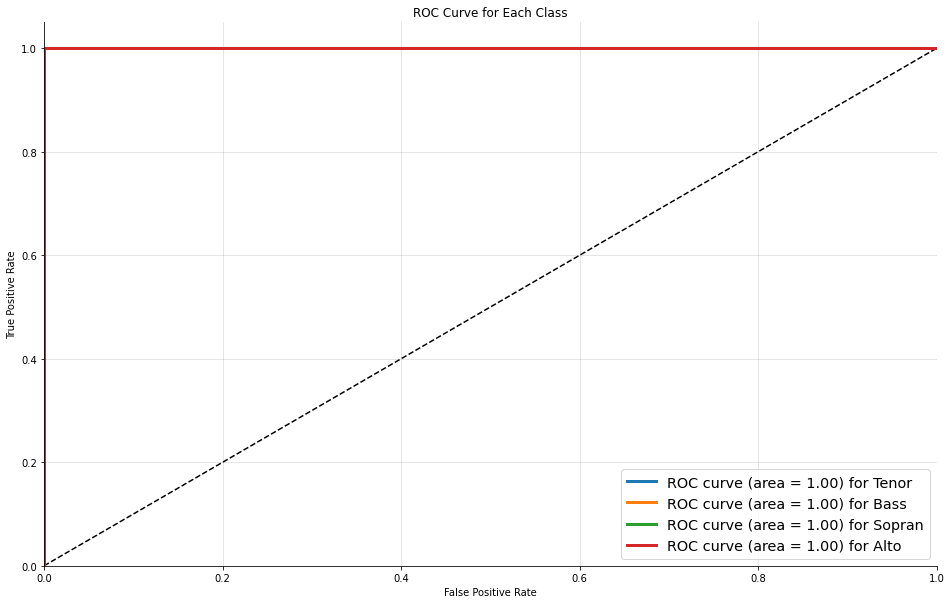

In [ ]:
# Plot ROC curves
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Each Class')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], linewidth=3, label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], c_names[i]))
ax.legend(loc="best", fontsize='x-large')
ax.grid(alpha=.4)
sns.despine()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

       Tenor       1.00      1.00      1.00       102
        Bass       1.00      1.00      1.00       153
      Sopran       1.00      1.00      1.00       102
        Alto       1.00      1.00      1.00       153

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# Confusion Matrix
print(confusion_matrix(y_testclass, classpreds))

[[102   0   0   0]
 [  0 153   0   0]
 [  0   0 102   0]
 [  0   0   0 153]]


In [ ]:
print('Micro Precision: {:.2f}'.format(precision_score(y_testclass, classpreds, average='macro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_testclass, classpreds, average='macro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_testclass, classpreds, average='macro')))

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

